# Importing libraries and data

In [1]:
# import relevant libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# set data_location containing profiles.csv file
data_location = 'data/profiles.csv'

# set branding colours
light_blue = '#6fa5d2'
medium_blue = '#456785'
dark_blue = '#293748'

# set max_columns and max_colwidth to make it easier to see data in DataFrame
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 100

In [2]:
# import profiles.csv file as a DataFrame and explore columns
all_data = pd.read_csv(data_location)
print(len(all_data))
print(all_data.columns.values)
all_data.head()

59946
['age' 'body_type' 'diet' 'drinks' 'drugs' 'education' 'essay0' 'essay1'
 'essay2' 'essay3' 'essay4' 'essay5' 'essay6' 'essay7' 'essay8' 'essay9'
 'ethnicity' 'height' 'income' 'job' 'last_online' 'location' 'offspring'
 'orientation' 'pets' 'religion' 'sex' 'sign' 'smokes' 'speaks' 'status']


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neithe...,"currently working as an international agent for a freight\nforwarding company. import, export, d...",making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexit...,"the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notic...","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), ...",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook rega...,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),NaN,i am die hard christopher moore fan. i don't really watch a lot of\ntv unless there is humor inv...,delicious porkness in all of its glories.<br />\nmy big ass doughboy's sinking into 15 new inche...,NaN,NaN,i am very open and will share just about anything.,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (poorly)",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public text on an online\ndating site makes me pleasantly u...","i make nerdy software for musicians, artists, and experimenters to\nindulge in their own weirdne...",improvising in different contexts. alternating between being\npresent and decidedly outside of a...,my large jaw and large glasses are the physical things people\ncomment on the most. when suffici...,"okay this is where the cultural matrix gets so specific, it's like\nbeing in the crosshairs.<br ...",movement<br />\nconversation<br />\ncreation<br />\ncontemplation<br />\ntouch<br />\nhumor,NaN,viewing. listening. dancing. talking. drinking. performing.,"when i was five years old, i was known as ""the boogerman"".","you are bright, open, intense, silly, ironic, critical, caring,\ngenerous, looking for an explor...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books according to the library\nof congress classification s...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, jarmusch, r.w. fassbender. . .<br />\ntwin peaks &a...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"hey how's it going? curre

# Processing and cleaning data for analysis

In [3]:
# drop columns that will not be used for project
columns_to_drop = [
    'education',
    'ethnicity',
    'job',
    'last_online',
    'location',
    'offspring',
    'orientation',
    'pets',
    'religion',
    'sign',
    'speaks',
    'status',
    'income', 
    'essay0',
    'essay1',
    'essay2',
    'essay3',
    'essay4',
    'essay5',
    'essay6',
    'essay7',
    'essay8',
    'essay9',
    'sex'
]
all_data.drop(columns_to_drop, axis=1, inplace=True)
all_data.columns.values

array(['age', 'body_type', 'diet', 'drinks', 'drugs', 'height', 'sex',
       'smokes'], dtype=object)

In [4]:
# check which columns have NaN values
all_data.isna().any()

age          False
body_type     True
diet          True
drinks        True
drugs         True
height        True
sex          False
smokes        True
dtype: bool

In [5]:
#remove NaNs in columns
other_columns_with_nan_values = [
    'body_type', 
    'diet', 
    'drinks', 
    'drugs', 
    'height', 
    'smokes'
]
all_data.dropna(subset=other_columns_with_nan_values, inplace=True)

In [6]:
# check that no columns have NaN values
all_data.isna().any()

# return length of data frame to see how many rows have been dropped
print(len(all_data))

25202


In [7]:
# determine value counts for diet responses
all_data['diet'].value_counts()

mostly anything        12290
anything                4357
strictly anything       3341
mostly vegetarian       2322
mostly other             741
strictly vegetarian      632
vegetarian               366
strictly other           310
other                    233
mostly vegan             222
strictly vegan           160
vegan                     86
mostly kosher             64
mostly halal              36
strictly halal            15
strictly kosher           14
halal                      7
kosher                     6
Name: diet, dtype: int64

In [8]:
# map diet responses to a number code

def map_diet_to_code(diet):
    if "vegan" in diet:
        return 0
    elif "vegetarian" in diet:
        return 1
    elif "kosher" in diet or "halal" in diet:
        return 2
    else:
        return 3
    
all_data['diet_code'] = all_data['diet'].apply(map_diet_to_code)

# check that mapping diet responses has worked 

all_data['diet_code'].value_counts()

3    21272
1     3320
0      468
2      142
Name: diet_code, dtype: int64

In [9]:
# determine value counts for drinks responses
all_data['drinks'].value_counts()

socially       17929
rarely          2896
often           2162
not at all      1789
very often       264
desperately      162
Name: drinks, dtype: int64

In [10]:
# map drinks responses to a number code

drinks_codes = {
    "not at all": 0,
    "rarely": 1,
    "socially": 2,
    "often": 3,
    "very often": 4,
    "desperately": 5
}

all_data["drinks_code"] = all_data['drinks'].map(drinks_codes)

#check that mapping drinks responses has worked 

all_data['drinks_code'].value_counts()

2    17929
1     2896
3     2162
0     1789
4      264
5      162
Name: drinks_code, dtype: int64

In [13]:
#determine value counts for drugs responses
all_data['drugs'].value_counts()

never        20339
sometimes     4600
often          263
Name: drugs, dtype: int64

In [14]:
# map drugs responses to a number code

drugs_codes = {
    "never": 0,
    "sometimes": 1,
    "often": 2
}

all_data["drugs_code"] = all_data['drugs'].map(drugs_codes)

#check that mapping drugs responses has worked 

all_data['drugs_code'].value_counts()

0    20339
1     4600
2      263
Name: drugs_code, dtype: int64

In [15]:
# determine value counts for smokes responses
all_data['smokes'].value_counts()

no                20402
sometimes          1688
when drinking      1429
yes                1032
trying to quit      651
Name: smokes, dtype: int64

In [16]:
# map smokes responses to a number code

smokes_codes = {
    "no": 0,
    "when drinking": 1,
    "sometimes": 2,
    "yes": 3,
    "trying to quit": 3
}

all_data["smokes_code"] = all_data['smokes'].map(smokes_codes)

#check that mapping smokes responses has worked 

all_data['smokes_code'].value_counts()

0    20402
2     1688
3     1683
1     1429
Name: smokes_code, dtype: int64

In [17]:
# determine value counts for body type responses
all_data['body_type'].value_counts()

average           6802
fit               5742
athletic          5366
thin              2191
curvy             1843
a little extra    1312
skinny             804
full figured       464
overweight         227
jacked             191
used up            182
rather not say      78
Name: body_type, dtype: int64

In [18]:
# remove rows where response is "rather not say"

all_data = all_data.loc[all_data['body_type'] != "rather not say",:]

# map body_type responses to a number code

body_type_codes = {
    "average": 0,
    "fit": 1,
    "athletic": 2,
    "thin": 3,
    "curvy": 4,
    "a little extra": 5,
    "skinny": 6,
    "full figured": 7,
    "overweight": 8,
    "jacked": 9,
    "used up": 10
}

all_data["body_type_code"] = all_data['body_type'].map(body_type_codes)

#check that mapping smokes responses has worked 

all_data['body_type_code'].value_counts()

0     6802
1     5742
2     5366
3     2191
4     1843
5     1312
6      804
7      464
8      227
9      191
10     182
Name: body_type_code, dtype: int64

In [19]:
# return length of data frame to see how many responses will be used for analysis
print(len(all_data))

25124


# Exploring the cleaned and processed data

average           6802
fit               5742
athletic          5366
thin              2191
curvy             1843
a little extra    1312
skinny             804
full figured       464
overweight         227
jacked             191
used up            182
dtype: int64


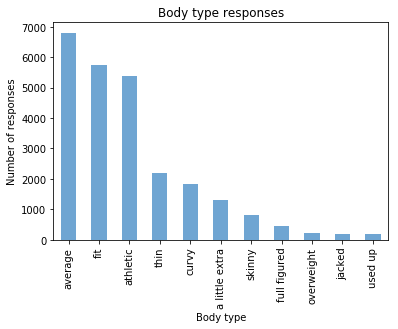

In [40]:
#generate bar chart for body type responses

body_type_responses = pd.value_counts(all_data['body_type'].values, sort=True)
print(body_type_responses)
ax = body_type_responses.plot(kind='bar', title='Body type responses', color=light_blue)
ax.set(xlabel='Body type', ylabel='Number of responses')
plt.show()

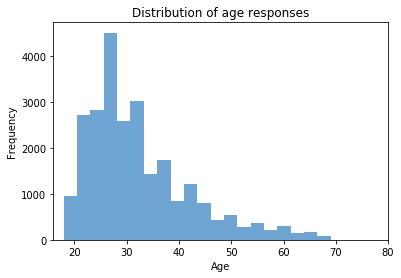

In [41]:
#generate histogram chart for age responses

plt.hist(all_data['age'], color=light_blue, bins=20)
plt.title("Distribution of age responses")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

In [42]:
all_data.corr()

,age,height,diet_code,drinks_code,drugs_code,smokes_code,body_type_code
age,1.000000,-0.046986,-0.039399,-0.112828,-0.167408,-0.153620,-0.048182
height,-0.046986,1.000000,0.065915,0.035809,0.073346,0.057508,-0.041274
diet_code,-0.039399,0.065915,1.000000,0.069316,-0.060261,0.017134,-0.014467
drinks_code,-0.112828,0.035809,0.069316,1.000000,0.218737,0.142761,0.020841
drugs_code,-0.167408,0.073346,-0.060261,0.218737,1.000000,0.348970,0.084404
smokes_code,-0.153620,0.057508,0.017134,0.142761,0.348970,1.000000,0.080216
body_type_code,-0.048182,-0.041274,-0.014467,0.020841,0.084404,0.080216,1.000000


# Question 1: Can we use diet, lifestyle information (alcohol consumption, drug use, tobacco use), and body type to predict age? 

### Prepare data for analysis - scale features and generate training and test data sets

In [20]:
# select features and scale data for regression

from sklearn.preprocessing import scale

list_of_features_for_analysis = [
    'diet_code',
    'drinks_code',
    'drugs_code',
    'smokes_code',
    'body_type_code',
]
features = all_data[list_of_features_for_analysis]
scaled_features = scale(features, axis=0)
age = all_data['age']

In [21]:
# generate training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, age, test_size=0.2, random_state=25)

### Use Multiple Linear regression

MLR training set score: 0.0463680266632
MLR test set score: 0.0432589272067


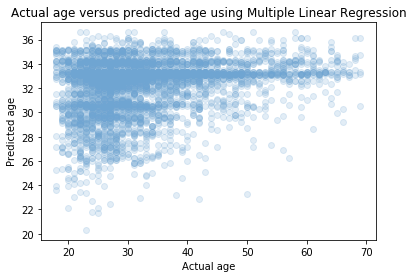

In [23]:
# build Multiple Linear Regression model to predict age

from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()

mlr_model.fit(X_train, y_train)

mlr_training_score = mlr_model.score(X_train, y_train)

print("MLR training set score: %s" %(mlr_training_score))

mlr_test_score = mlr_model.score(X_test, y_test)

print("MLR test set score: %s" %(mlr_test_score))

#generate plot showing difference between predicted age and actual age using Multiple Linear Regression model

mlr_predictions = mlr_model.predict(X_test)

plt.scatter(y_test, mlr_predictions, c=light_blue, alpha=0.2)
plt.title("Actual age versus predicted age using Multiple Linear Regression")
plt.xlabel("Actual age")
plt.ylabel("Predicted age")
plt.show()

### Use K Neighbors regression

KNR training set score: 0.09228919445
KNR test set score: 0.026069192568


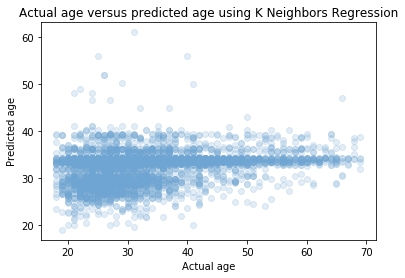

In [30]:
#build K Neighbors Regressor to predict age

from sklearn.neighbors import KNeighborsRegressor

kn_regressor = KNeighborsRegressor(n_neighbors = 50, weights = "distance")
kn_regressor.fit(X_train, y_train)

knr_training_score = kn_regressor.score(X_train, y_train)

print("KNR training set score: %s" %(knr_training_score))

knr_test_score = kn_regressor.score(X_test, y_test)

print("KNR test set score: %s" %(knr_test_score))

#generate plot showing difference between predicted age and actual age using K Neighbors Regressor

knr_predictions = kn_regressor.predict(X_test)

plt.scatter(y_test, knr_predictions, c=light_blue, alpha=0.2)
plt.title("Actual age versus predicted age using K Neighbors Regression")
plt.xlabel("Actual age")
plt.ylabel("Predicted age")
plt.show()

# Question 2: Can we use diet, lifestyle information (alcohol consumption, drug use, tobacco use), and age to predict body type?

### Prepare data for analysis - scale features and generate training and test data sets

In [31]:
# select features and scale data for regression

from sklearn.preprocessing import scale

list_of_features_classification = [
    'diet_code',
    'drinks_code',
    'drugs_code',
    'smokes_code',
    'age'
]
features_classification = all_data[list_of_features_classification]
scaled_features_classification = scale(features_classification, axis=0)
labels = all_data['body_type_code']

In [32]:
# generate training and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_features_classification, labels, test_size=0.2, random_state=40)

### Use K Nearest Neighbours classification

In [33]:
# build K Nearest Neighbors model to predict body type

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=76)
knn_classifier.fit(train_data, train_labels)

knn_training_score = knn_classifier.score(train_data, train_labels)

print("KNN training set score: %s" %(knn_training_score))

knn_test_score = knn_classifier.score(test_data, test_labels)

print("KNN test set score: %s" %(knn_test_score))

KNN training set score: 0.287924772377
KNN test set score: 0.277810945274


In [34]:
# generate classification report and confusion matrix for K Nearest Neighbors classifier

from sklearn.metrics import classification_report, confusion_matrix 

knn_predictions = knn_classifier.predict(test_data)
print(confusion_matrix(test_labels, knn_predictions))
print(classification_report(test_labels, knn_predictions))

[[773 357 213   0   0   0   0   0   0   0   0]
 [525 402 212   0   0   0   0   0   0   0   0]
 [508 344 221   0   0   0   0   0   0   0   0]
 [249 136  82   0   0   0   0   0   0   0   0]
 [190 121  61   0   0   0   0   0   0   0   0]
 [160  64  37   0   0   0   0   0   0   0   0]
 [112  42  19   0   0   0   0   0   0   0   0]
 [ 36  28  16   0   0   0   0   0   0   0   0]
 [ 22  13   7   0   0   0   0   0   0   0   0]
 [ 22  12   5   0   0   0   0   0   0   0   0]
 [ 27   5   4   0   0   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.29      0.58      0.39      1343
          1       0.26      0.35      0.30      1139
          2       0.25      0.21      0.23      1073
          3       0.00      0.00      0.00       467
          4       0.00      0.00      0.00       372
          5       0.00      0.00      0.00       261
          6       0.00      0.00      0.00       173
          7       0.00      0.00      0.00        80
    

/Users/Andrew/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


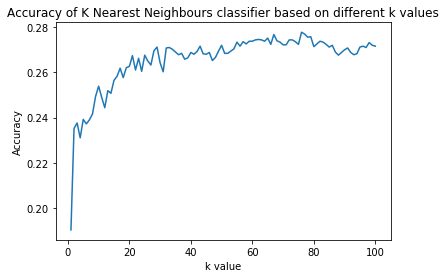

{'k': 76, 'score': 0.27781094527363182}


In [35]:
# generate plot showing K Nearest Neighbors classifier score based on different n_neighbors values 
# and print out n_neighbors value that results in highest score

scores = []

highest_score = {
    'k': 0,
    'score': 0
}

for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    score = classifier.score(test_data, test_labels)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'k': k,
            'score': score
        }

x_values = range(1, 101)

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of K Nearest Neighbours classifier based on different k values')
plt.ylabel('Accuracy')
plt.xlabel('k value')
plt.show()
print(highest_score)

### Use Support Vector Machines classification

In [37]:
from sklearn.svm import SVC

svc_classifier = SVC(kernel='rbf', gamma=10)
svc_classifier.fit(train_data, train_labels)

svc_training_score = svc_classifier.score(train_data, train_labels)

print("SVC training set score: %s" %(svc_training_score))

svc_test_score = classifier.score(test_data, test_labels)

print("SVC test set score: %s" %(svc_test_score))

SVC training set score: 0.321359271606
SVC test set score: 0.271641791045


In [38]:
# generate classification report and confusion matrix for Support Vector Machines classifier

from sklearn.metrics import classification_report, confusion_matrix 

svc_predictions = svc_classifier.predict(test_data)
print(confusion_matrix(test_labels, svc_predictions))
print(classification_report(test_labels, svc_predictions))

[[753 320 260   4   1   1   1   1   0   0   2]
 [554 305 273   3   1   2   0   0   0   0   1]
 [526 277 265   3   0   0   0   0   0   0   2]
 [245 127  89   3   0   0   1   0   0   0   2]
 [212  84  74   1   0   0   1   0   0   0   0]
 [156  54  46   3   0   2   0   0   0   0   0]
 [114  22  32   2   2   0   1   0   0   0   0]
 [ 44  20  16   0   0   0   0   0   0   0   0]
 [ 23  13   5   0   0   0   0   0   1   0   0]
 [ 24   7   7   0   0   0   0   0   0   0   1]
 [ 26   6   3   0   0   0   0   0   0   0   1]]
             precision    recall  f1-score   support

          0       0.28      0.56      0.37      1343
          1       0.25      0.27      0.26      1139
          2       0.25      0.25      0.25      1073
          3       0.16      0.01      0.01       467
          4       0.00      0.00      0.00       372
          5       0.40      0.01      0.02       261
          6       0.25      0.01      0.01       173
          7       0.00      0.00      0.00        80
    

/Users/Andrew/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


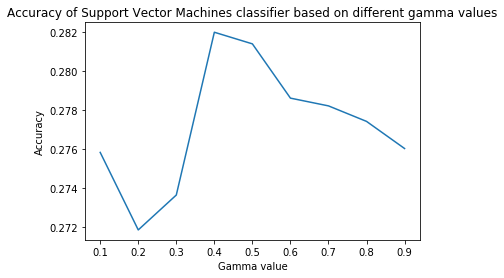

{'gamma': 0.40000000000000002, 'score': 0.28199004975124375}


In [39]:
# generate plot showing SVC Classifier score based on different gamma values 
# and print out gamma value that results in highest score

scores = []

highest_score = {
    'gamma': 0,
    'score': 0
}

gamma_values = np.arange(0.1, 1.0, 0.1)

for val in gamma_values:
    svc_classifier = SVC(kernel='rbf', gamma=val)
    svc_classifier.fit(train_data, train_labels)
    score = svc_classifier.score(test_data, test_labels)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'gamma': val,
            'score': score
        }

x_values = gamma_values

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of Support Vector Machines classifier based on different gamma values')
plt.ylabel('Accuracy')
plt.xlabel('Gamma value')
plt.show()
print(highest_score)